## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
SEED = 0

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [ ]:
X.isna().any(None) # пропусков нет

False

In [ ]:
X.describe() # ничего странного нет. Скорее всего, пропусков действительно нет

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
X = pd.get_dummies(X, drop_first=True)
X # категориальных переменных нет

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(SEED)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X_train_used = X_train[["alcohol", "magnesium"]]
X_test_used = X_test[["alcohol", "magnesium"]]
scaler = StandardScaler()
scaler.fit(X_train_used)
X_train_used = scaler.transform(X_train_used)
X_test_used = scaler.transform(X_test_used)

models = [ KNeighborsClassifier(n_neighbors = neighbors, p = 2).fit(X_train_used, y_train) for neighbors in [ 1, 3, 5, 10, 15, 25 ] ]
labels = [ f'n_neighbors = {neighbors}' for neighbors in [ 1, 3, 5, 10, 15, 25 ] ]

results = pd.DataFrame(columns = [ 'Train', 'Test' ])
for index, model in enumerate(models):
  results.loc[f'{labels[index]}'] = [ f'{accuracy_score(y_train, model.predict(X_train_used))}', f'{accuracy_score(y_test, model.predict(X_test_used))}' ]
results

,Train,Test
n_neighbors = 1,1.0,0.6666666666666666
n_neighbors = 3,0.8064516129032258,0.7777777777777778
n_neighbors = 5,0.75,0.7222222222222222
n_neighbors = 10,0.7338709677419355,0.7777777777777778
n_neighbors = 15,0.7338709677419355,0.7962962962962963
n_neighbors = 25,0.6693548387096774,0.7962962962962963


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend==0.18.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

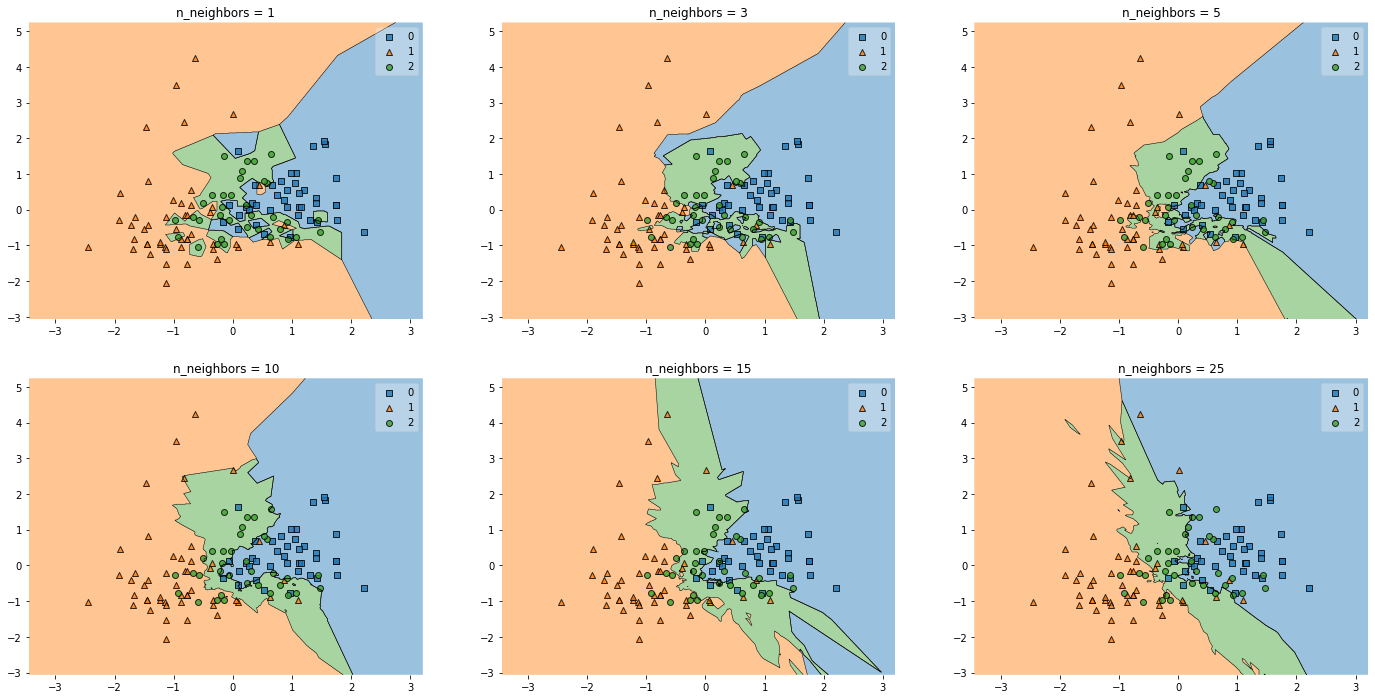

In [ ]:
# my solution
from mlxtend.plotting import plot_decision_regions

figure, axes = plt.subplots(2, 3, figsize = (24, 12))
for index, model in enumerate(models):
  plot_decision_regions(X_train_used, y_train, clf = model, ax = axes.flatten()[index])
  axes.flatten()[index].set_title(labels[index])
plt.show()

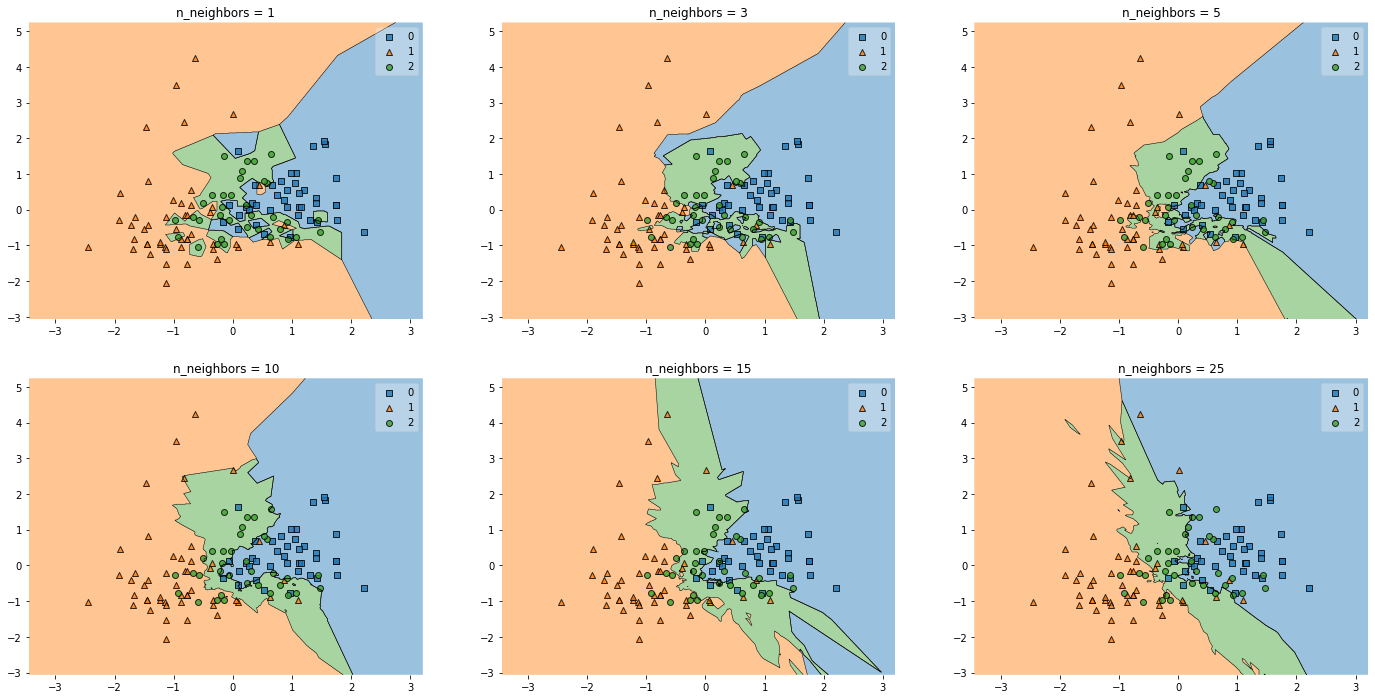

In [ ]:
# alternative solution with gridspec and itertools (I guess this one was descibed in the task)
import matplotlib.gridspec as gridspec
import itertools

gridspec = gridspec.GridSpec(2, 3)
plt.figure(figsize = (24, 12))
for model, label, place in zip(models, labels, itertools.product([0, 1], [0, 1, 2])):
    plt.subplot(gridspec[place[0], place[1]])
    plot_decision_regions(X_train_used, y_train, clf = model)
    plt.title(label)
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

- Задание 1.3 показывает, что доля правильных ответов на обучающей выборке уменьшается с увеличением числа соседей. Тем не менее на тестовой выборке результат иной: доля правильных ответов максимальна для моделей, рассматривающий 15 и 25 соседей. \\
- Результат задания 1.5 также подтверждает, что 15 - оптимальное число соседей для классификатора.
    + Для 1, 3 и 5 соседей явно наблюдается переобучение - полученные решающие поверхности совершенно не гладкие и содержат "острова", что негативно отражается на качестве модели.
    + Для 10 соседей "острова" отсутствуют, но большой синий "полуостров" - не очень хорошая решающая поверхность, что, в совокупности с довольной странной формой зелёной части, не позволяет считать эту модель достаточно хорошей.
    + Для 15 соседей решающие поверхности больше напоминают прямые линии, но большое количество "изломов" (особенно линии раздела зелёной и оранжевой частей), явно выделяющийся синий "полуостров" и что-то странное в правом нижнем углу изображения всё равно не позволяют утверждать об оптимальности рассмотрения 15 соседей.
    + Для 25 соседей же разделяющие линии оказываются достаточно гладкими, хотя в верхней части линии раздела оранжевой и зелёной поверхностей это не прослеживается. Синий "полуостров" также наблюдается, но его размер не настолько велик, как у других моделей. Скорее всего, можно подобрать число соседей, которое покажет ещё более хороший результат, но среди рассмотренных, 25 - наиболее оптимальный выбор. \\
  
Таким образом, по совокупности результатов заданий 1.3 и 1.5 можно сделать вывод, что среди рассмотренных моделей наиболее хорошие результаты показывает модель, рассматривающая 25 ближайших соседей.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

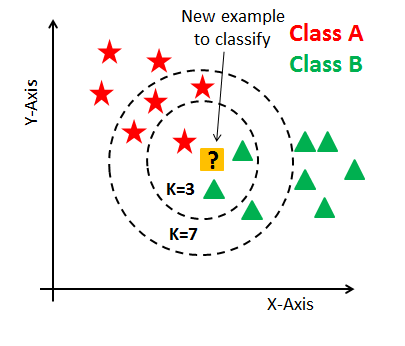

In [ ]:
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
      self.X_train = X
      self.y_train = y
      return

    def __distances(self, x: np.array):
      return np.sqrt(np.square(self.X_train - x).sum(axis = 1))
    def __nearestTargets(self, x: np.array):
      return self.y_train[np.argsort(self.__distances(x))][0:self.k]
    def __getAnswer(self, x: np.array):
      return Counter(self.__nearestTargets(x)).most_common(1)[0][0]
    def predict(self, X):
      return np.apply_along_axis(self.__getAnswer, 1, X)

In [ ]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.

In [ ]:
data.isna().any(None) # пропусков нет

False

In [ ]:
data.describe() # минимальное значение x, y, z - 0. Странно. Вероятно, это пропущенные значения

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


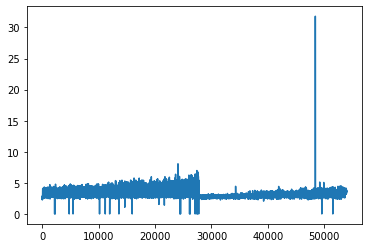

In [ ]:
plt.plot(data[["z"]]) # явно видно, что нулевые значения - пропущенные.
# Также интересно одно большое значение, но оно не выглядит пропущенным. Скорее всего, просто выброс

In [ ]:
# удалим нулевые значения
data = data.drop(data.loc[data['z'] == 0].index)
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
data.describe() # Теперь всё выглядит хорошо. Больше пропущенных значений нет

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,15571.269010,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13487.750000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.250000,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
data = data.drop(columns = [ 'Unnamed: 0' ])
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [ ]:
# k = 6 (carat, depth, table, x, y, z) + price
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


Больше всего с целевой переменной коррелируют признаки carat, x, y, z

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
data = pd.get_dummies(data, drop_first=True)
data

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [ ]:
np.random.seed(SEED)

X = data[data.columns[data.columns != 'price']]
y = data[["price"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
from sklearn.compose import ColumnTransformer

scaler = ColumnTransformer([
  ( 'standard', StandardScaler(), [ 'carat', 'depth', 'table', 'x', 'y', 'z' ] )
], remainder = 'passthrough') # Change only real features, ignore the ones received from one-hot encoding

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.041362,-0.319886,0.245397,1.118034,1.178390,1.076176,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.943759,0.100906,-1.550295,-1.071763,-1.036527,-1.017486,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.217748,-2.353715,1.592166,0.537067,0.584144,0.241540,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.985996,0.241170,-1.101372,-1.134329,-1.171583,-1.102365,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.428931,0.872358,-0.652449,0.528129,0.575140,0.651785,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16171,0.724588,-1.722527,0.694320,0.957151,0.926285,0.680078,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16172,-0.817050,1.223018,-1.101372,-0.893004,-0.937486,-0.776998,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16173,2.223988,0.451566,-0.203526,1.949263,1.916695,1.953251,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16174,-1.049351,0.171038,-1.550295,-1.277336,-1.252616,-1.215536,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

linreg_train_error = mean_squared_error(y_train, model.predict(X_train))
linreg_test_error = mean_squared_error(y_test, model.predict(X_test))

print(f"Train: { linreg_train_error }")
print(f"Test: { linreg_test_error }")

Train: 1257817.2588556723
Test: 1504753.9126334959


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
basecoefs = model.coef_[0]
pd.DataFrame(np.array([ X.columns, basecoefs ]).transpose(), columns = [ "Column", "Coefs" ])

,Column,Coefs
0,carat,5434.933132
1,depth,-93.192318
2,table,-59.880207
3,x,-2308.830031
4,y,1120.414853
5,z,-82.432783
6,cut_Good,524.081917
7,cut_Ideal,784.560634
8,cut_Premium,742.898528
9,cut_Very Good,657.869745


Вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных: carat, x, y

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(10.0).fit(X_train, y_train)
deltas = np.abs(model.coef_ - basecoefs)

result = pd.DataFrame(
              np.array([ X.columns, model.coef_, basecoefs, deltas, deltas / np.abs(basecoefs) * 100  ]).transpose(),
              columns = [ "Column", "New coefs", "Old coefs", "Absolute change", "Relative change (%)" ]
)
display(result)
result[[ "Absolute change", "Relative change (%)" ]].mean()

,Column,New coefs,Old coefs,Absolute change,Relative change (%)
0,carat,4818.4244,5434.933132,616.508731,11.343446
1,depth,-158.947887,-93.192318,65.755569,70.559001
2,table,-108.489953,-59.880207,48.609746,81.178319
3,x,-728.219338,-2308.830031,1580.610692,68.459379
4,y,-0.0,1120.414853,1120.414853,100.0
5,z,-49.051977,-82.432783,33.380806,40.494576
6,cut_Good,-0.0,524.081917,524.081917,100.0
7,cut_Ideal,170.808025,784.560634,613.752609,78.228831
8,cut_Premium,71.550338,742.898528,671.34819,90.36876
9,cut_Very Good,91.474172,657.869745,566.395573,86.095398


Absolute change        1480.734916
Relative change (%)      75.018900
dtype: float64

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(10.0).fit(X_train, y_train)
deltas = np.abs(model.coef_[0] - basecoefs)

result = pd.DataFrame(
              np.array([ X.columns, model.coef_[0], basecoefs, deltas, deltas / np.abs(basecoefs) * 100  ]).transpose(),
              columns = [ "Column", "New coefs", "Old coefs", "Absolute change", "Relative change (%)" ]
)
display(result)
result[[ "Absolute change", "Relative change (%)" ]].mean()

,Column,New coefs,Old coefs,Absolute change,Relative change (%)
0,carat,5375.158705,5434.933132,59.774426,1.099819
1,depth,-96.424702,-93.192318,3.232384,3.468509
2,table,-63.332137,-59.880207,3.45193,5.764726
3,x,-2030.073124,-2308.830031,278.756907,12.073514
4,y,892.965763,1120.414853,227.44909,20.300435
5,z,-85.481212,-82.432783,3.04843,3.698079
6,cut_Good,562.183483,524.081917,38.101566,7.270155
7,cut_Ideal,825.628974,784.560634,41.06834,5.234565
8,cut_Premium,773.468595,742.898528,30.570066,4.114972
9,cut_Very Good,705.796903,657.869745,47.927157,7.285205


Absolute change        202.375256
Relative change (%)      7.873257
dtype: float64

Вывод: веса уменьшились, особенно для модуля Lasso, где среднее изменение составило 1480 (75%). \\
Особенно сильное изменение наблюдается для коэффициентов при признаках x и y, что ожидаемо: эти признаки коллинеарны - если увеличивается ширина алмаза, то, скорее всего, увеличиваются и его длина и глубина (именно поэтому коэффициенты при этих признаках в изначальное регрессии были на порядок больше остальных). \\
Также достаточно сильно изменились коэффициенты при всех "версиях" признака clarity. Для Lasso-регрессии также наблюдается значительное изменение некоторых других коэффициентов. \\
Таким образом, проблема мультиколлинеарности в изначальной регрессии действительно проявлялась.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

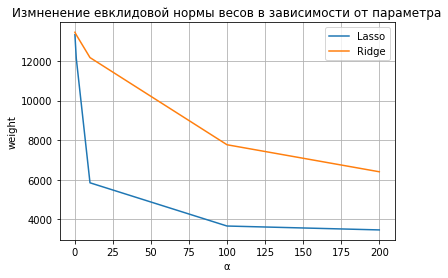

In [ ]:
params = [ 0.1, 1, 10, 100, 200 ]

plt.plot(params, [ np.linalg.norm(Lasso(param, max_iter = 10000).fit(X_train, y_train).coef_) for param in params ], label = 'Lasso')
plt.plot(params, [ np.linalg.norm(Ridge(param).fit(X_train, y_train).coef_) for param in params ], label = 'Ridge')

plt.grid()
plt.legend()
plt.title("Измненение евклидовой нормы весов в зависимости от параметра")
plt.xlabel("α")
plt.ylabel("weight")
plt.show()

Lasso уменьшает веса агрессивнее. Именно поэтому Lasso-регрессию часто применяют для отбора признаков: в отличие от Ridge, Lasso гораздо лучше позволяет установить, какие признаки являются наименее информативными, обнуляя их веса уже при достаточно небольших значениях коэффициента регуляризации.

**Задача 3.11 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [ ]:
from sklearn.linear_model import LassoCV

model = LassoCV(alphas = params, cv = 5, max_iter = 10000)
model.fit(X_train, y_train.values.ravel())
results = pd.DataFrame(model.mse_path_.transpose(), columns = model.alphas_)
results

,200.0,100.0,10.0,1.0,0.1
0,2.403097e+06,2.222332e+06,1.555797e+06,1.293748e+06,1.283880e+06
1,2.430276e+06,2.215771e+06,1.454178e+06,1.195208e+06,1.188914e+06
2,2.399456e+06,2.189514e+06,1.510458e+06,1.447482e+06,1.662821e+06
3,2.383783e+06,2.184718e+06,1.480428e+06,1.310774e+06,1.309783e+06
4,2.463622e+06,2.251317e+06,1.499116e+06,1.289718e+06,1.284377e+06


In [ ]:
results.mean(axis = 0)

200.0    2.416047e+06
100.0    2.212730e+06
10.0     1.499996e+06
1.0      1.307386e+06
0.1      1.345955e+06
dtype: float64

Наибольшее качество даёт значение 1.0

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
model = Lasso(1.0, max_iter = 10000).fit(X_train, y_train)
deltas = np.abs(model.coef_ - basecoefs)

result = pd.DataFrame(
              np.array([ X.columns, model.coef_, basecoefs, deltas, deltas / np.abs(basecoefs) * 100  ]).transpose(),
              columns = [ "Column", "New coefs", "Old coefs", "Absolute change", "Relative change (%)" ]
)
display(result)
result[[ "Absolute change", "Relative change (%)" ]].mean()

,Column,New coefs,Old coefs,Absolute change,Relative change (%)
0,carat,5377.571464,5434.933132,57.361668,1.055425
1,depth,-107.472614,-93.192318,14.280295,15.323468
2,table,-67.978454,-59.880207,8.098247,13.52408
3,x,-1558.31679,-2308.830031,750.513241,32.506214
4,y,398.039729,1120.414853,722.375124,64.473897
5,z,-64.650352,-82.432783,17.782431,21.572038
6,cut_Good,458.56144,524.081917,65.520478,12.501954
7,cut_Ideal,716.726602,784.560634,67.834032,8.646117
8,cut_Premium,649.411842,742.898528,93.486686,12.584045
9,cut_Very Good,609.091334,657.869745,48.778412,7.4146


Absolute change        249.265549
Relative change (%)     15.087999
dtype: float64

Наиболее информативными оказались признаки carat, x и clarity, коэффициенты при которых велики даже после "поправки" на мультиколлинеарность признаков. \\
Наименее информативными можно считать признаки depth и table, коэффициенты при которых достаточно малы, а также признаки y и z, которые фактически учитываются коэффициентом при переменной x, на что и указывают их маленькие итоговые коэффициенты при достаточно большом изменении в сравнении с обычной линейной регрессией. \\
 \\
Я не эксперт в алмазах, но достаточно очевидно, что вес алмаза (carat) и его чистота (clarity) оказывают большое влияние на стоимость. \\
Интересно, что размер алмаза в ширину и в глубину влияют на стоимость слабо, но размер алмаза в длину напротив значительно уменьшает стоимость. Это, скорее всего, связано именно с тем, как работает Lasso-регрессия: размеры алмаза по всем осям - коррелированные величины (если увеличивается длина алмаза, то с большой вероятностью увеличиваются и его ширина и глубина). Именно поэтому у "x" коэффициент большой по модулю, а у "y" и "z" на порядок меньше: эти параметры были фактически "удалены" из модели (вместо трёх параметров остался один). \\
Признаки depth и table, судя по описанию, достаточно специфичны, а их влияние на стоимость совершенно не очевидно. Обычному покупателю эти признаки не дают много информации. Вероятно, именно поэтому они слабо влияют на модель.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
# обычная линейная регрессия
print(f"Train: { linreg_train_error }")
print(f"Test: { linreg_test_error }")

Train: 1257817.2588556723
Test: 1504753.9126334959


In [ ]:
# Lasso-регрессия
print(f"Train: { mean_squared_error(y_train.to_numpy(), model.predict(X_train)) }")
print(f"Test: { mean_squared_error(y_test.to_numpy(), model.predict(X_test)) }")

Train: 1263526.1571115502
Test: 1326704.034533752


Таким образом, ожидаемо, для предсказаний лучше использовать Lasso-регрессию. Хотя отличие и не очень велико (всего 12%), оно заметно - для Lasso-регрессии MSE на 180000 меньше, чем для обычной линейной регрессии, что объясняется использованием регуляризации, которая позволяет избежать переобучение при наличии корреллированных признаков и улучшает качество модели. \\
Тем не менее обе модели показывают достаточно плохой результат, но это, скорее всего, вызвано структурой данных - линейная модель к рассмотренному набору подходит не очень хорошо.